# 사전작업

## 모듈 불러오기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 데이터 불러오기

### `train`, `test`

In [2]:
train = pd.read_csv("data/titanic/train.csv")
test = pd.read_csv("data/titanic/test.csv")

In [3]:
print(type(train))
print(type(test))
print(train.shape)
print(test.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
(891, 12)
(418, 11)


In [4]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


### `total`

In [6]:
train_temp = train.drop(['Survived'], axis = 1)
total = pd.concat([train_temp,test])
total.shape

(1309, 11)

### 결측치 제거

In [7]:
total.isnull().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [8]:
total['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
413     NaN
414    39.0
415    38.5
416     NaN
417     NaN
Name: Age, Length: 1309, dtype: float64

In [9]:
total['Age'].isnull().sum()

263

In [10]:
total.isnull().sum() / len(total)

PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.200917
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000764
Cabin          0.774637
Embarked       0.001528
dtype: float64

In [11]:
total.shape

(1309, 11)

In [12]:
total.drop('Cabin',axis = 1, inplace = True)

In [13]:
total.shape

(1309, 10)

In [14]:
train.shape

(891, 12)

In [15]:
train.drop('Cabin',axis = 1, inplace = True)

In [16]:
train.shape

(891, 11)

# 열 분석

## 이름 : 'Mr.', 'Mrs.', 'Miss.'

In [17]:
total["Name"].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [18]:
import re
def find_M(data):
    wow = re.search("[A-Z][a-z]+\.", data)
    if wow == None:
        return None
    return wow.group(0)

In [19]:
total["Name_convert"] = total["Name"].map(find_M)
train["Name_convert"] = train["Name"].map(find_M)

In [20]:
print(total.shape)
print(total.columns)
print(train.shape)
print(train.columns)

(1309, 11)
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked', 'Name_convert'],
      dtype='object')
(891, 12)
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Name_convert'],
      dtype='object')


In [21]:
total["Name_convert"].unique()

array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Don.', 'Rev.', 'Dr.', 'Mme.',
       'Ms.', 'Major.', 'Lady.', 'Sir.', 'Mlle.', 'Col.', 'Capt.',
       'Countess.', 'Jonkheer.', 'Dona.'], dtype=object)

In [22]:
total["Name_convert"].value_counts()

Mr.          757
Miss.        260
Mrs.         197
Master.       61
Rev.           8
Dr.            8
Col.           4
Mlle.          2
Major.         2
Ms.            2
Lady.          1
Sir.           1
Mme.           1
Don.           1
Capt.          1
Countess.      1
Jonkheer.      1
Dona.          1
Name: Name_convert, dtype: int64

## 나이

In [23]:
total["Age"].isnull().sum()

263

In [24]:
total["Age"].value_counts()

24.0    47
22.0    43
21.0    41
30.0    40
18.0    39
        ..
23.5     1
70.5     1
55.5     1
20.5     1
38.5     1
Name: Age, Length: 98, dtype: int64

In [25]:
total["Age"].min()

0.17

In [26]:
total["Age"].max()

80.0

### 나이값에 대한 보간

In [27]:
total.groupby(["Pclass", "Sex"])["Age"].mean()

Pclass  Sex   
1       female    37.037594
        male      41.029272
2       female    27.499223
        male      30.815380
3       female    22.185329
        male      25.962264
Name: Age, dtype: float64

In [28]:
total["Age"].fillna(total.groupby(["Pclass", "Sex"])["Age"].transform("mean") , inplace = True)

In [29]:
total["Age"].value_counts()

25.962264    144
22.185329     64
24.000000     47
22.000000     43
21.000000     41
            ... 
70.500000      1
0.670000       1
20.500000      1
24.500000      1
38.500000      1
Name: Age, Length: 104, dtype: int64

In [30]:
total["Age"] = np.floor(total["Age"]).astype('int')

In [31]:
total["Age"].value_counts()

25    178
22    108
30     55
24     48
18     42
     ... 
74      1
67      1
66      1
80      1
76      1
Name: Age, Length: 73, dtype: int64

In [32]:
total.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Name_convert
0,1,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S,Mr.
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C,Mrs.
2,3,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S,Miss.
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S,Mrs.
4,5,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S,Mr.


### 나이대별 승객 수 : 히스토그램

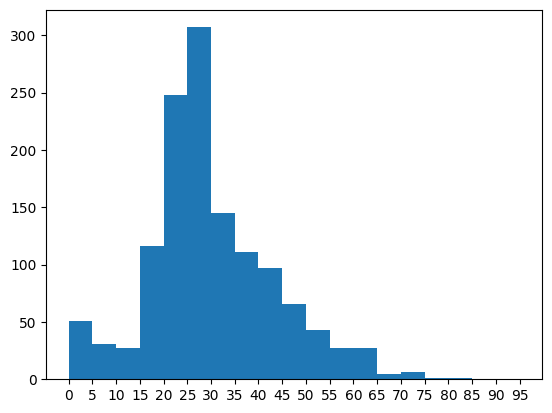

In [33]:
plt.hist(total["Age"], bins = range(0,100,5))
plt.xticks(range(0,100,5))
plt.show()

# 생존자 수 및 생존률 분석

## 전체 생존률 : 원 그래프

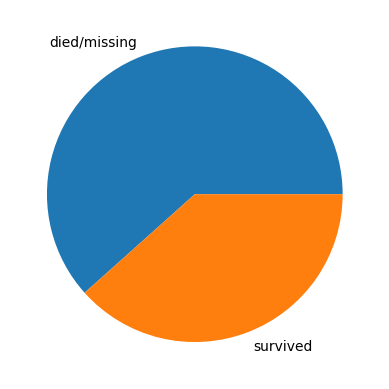

In [34]:
plt.pie(train["Survived"].value_counts(), labels = ['died/missing', 'survived'])
plt.show()

In [35]:
male_survived = train.loc[(train["Sex"]=='male')&(train["Survived"]==1)]

In [36]:
male = train.loc[train["Sex"]=='male']

## 성별 생존률 : 원 그래프

In [37]:
survival_rate_of_male = len(male_survived)/len(male)
survival_rate_of_male

0.18890814558058924

In [38]:
female_survived = train.loc[(train["Sex"]=='female')&(train["Survived"]==1)]

In [39]:
female = train.loc[train["Sex"]=='female']

In [40]:
survival_rate_of_female = len(female_survived)/len(female)
survival_rate_of_female

0.7420382165605095

In [41]:
survival_counts_of_male = [len(train.loc[ (train["Sex"]=='male') & (train["Survived"]==1)]), \
         len(train.loc[ (train["Sex"]=='male')& (train["Survived"]==0)]) ]
print(survival_counts_of_male)
survival_counts_of_female = [len(train.loc[ (train["Sex"]=='female') & (train["Survived"]==1)]), \
         len(train.loc[ (train["Sex"]=='female')& (train["Survived"]==0)]) ]
print(survival_counts_of_female)

[109, 468]
[233, 81]


Text(0.5, 1.0, 'female')

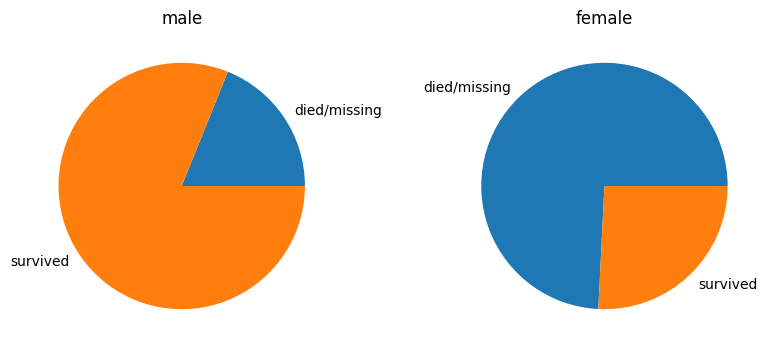

In [42]:
plt.rcParams["figure.figsize"] = (10,4)
plt.subplot(121)
plt.pie(survival_counts_of_male, labels = ["died/missing", "survived"])
plt.title('male')
plt.subplot(122)
plt.pie(survival_counts_of_female, labels = ["died/missing", "survived"])
plt.title('female')

## 좌석별 생존률 : 원 그래프 / 표

In [43]:
survival_counts_of_first = [len(train.loc[ (train["Pclass"]==1) & (train["Survived"]==1)]), \
         len(train.loc[ (train["Pclass"]==1)& (train["Survived"]==0)]) ]
print(survival_counts_of_first)
survival_counts_of_second = [len(train.loc[ (train["Pclass"]==2) & (train["Survived"]==1)]), \
         len(train.loc[ (train["Pclass"]==2)& (train["Survived"]==0)]) ]
print(survival_counts_of_second)
survival_counts_of_third = [len(train.loc[ (train["Pclass"]==3) & (train["Survived"]==1)]), \
         len(train.loc[ (train["Pclass"]==3)& (train["Survived"]==0)]) ]
print(survival_counts_of_third)

[136, 80]
[87, 97]
[119, 372]


Text(0.5, 1.0, 'third class')

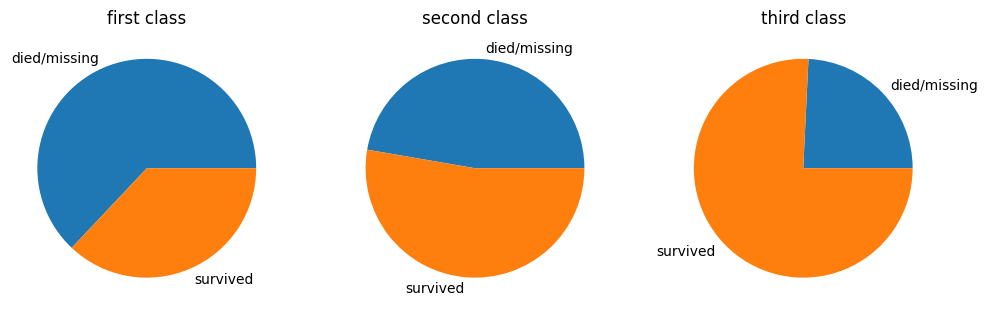

In [44]:
plt.rcParams["figure.figsize"] = (12,4)
plt.subplot(131)
plt.pie(survival_counts_of_first, labels = ["died/missing", "survived"])
plt.title('first class')
plt.subplot(132)
plt.pie(survival_counts_of_second, labels = ["died/missing", "survived"])
plt.title('second class')
plt.subplot(133)
plt.pie(survival_counts_of_third, labels = ["died/missing", "survived"])
plt.title('third class')


In [45]:
pd.crosstab(train["Pclass"], train["Survived"], margins = True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


## 성별, 좌석별 생존률 : 표

In [46]:
pd.crosstab([train["Pclass"],train["Sex"]],train["Survived"])

Survived         0   1
Pclass Sex            
1      female    3  91
       male     77  45
2      female    6  70
       male     91  17
3      female   72  72
       male    300  47

## 나이별 생존자/비생존자 수 : 히스토그램

### 나이대별 승객 수 : 히스토그램

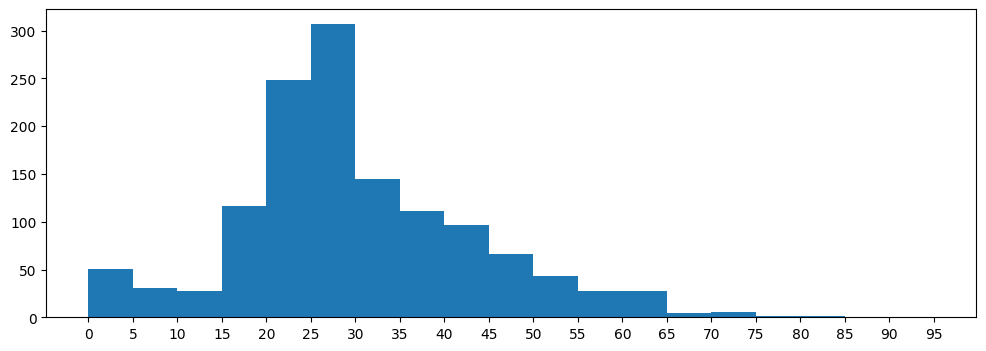

In [56]:
plt.hist(total["Age"], bins = range(0,100,5))
plt.xticks(range(0,100,5))
plt.show()

### 나이대별 생존자 수 : 히스토그램

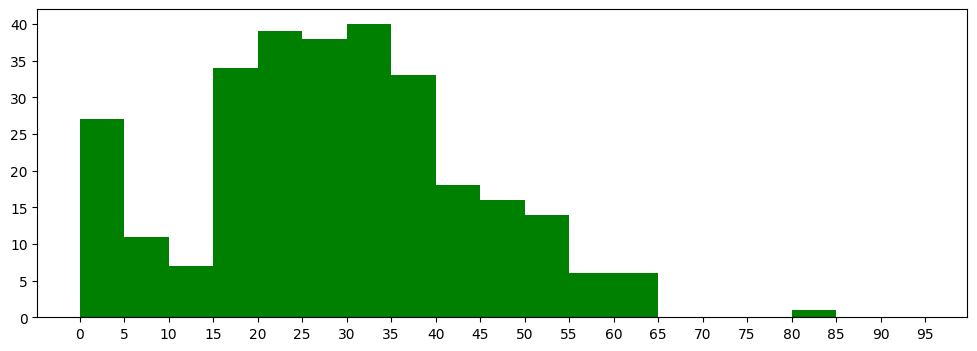

In [54]:
plt.hist(train[train["Survived"]==1]["Age"], bins = range(0,100,5), color = 'g')
plt.xticks(range(0,100,5))
plt.show()

### 나이대별 비생존자 수 : 히스토그램

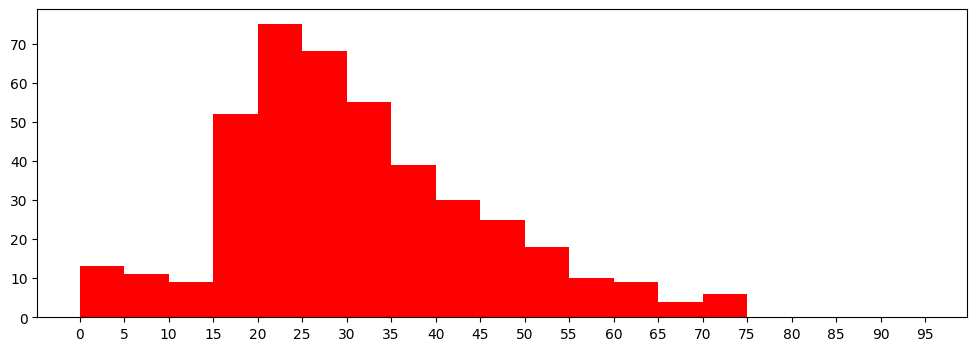

In [55]:
plt.hist(train[train["Survived"]==0]["Age"], bins = range(0,100,5), color = 'r')
plt.xticks(range(0,100,5))
plt.show()

## 동반가족 별 생존자수

# 요금과 좌석